In [1]:
import pandas as pd 
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv('/Users/surajmaity/ML_projects/FastAPI_app/Salary_dataset.csv')

In [3]:
df.shape

(30, 3)

In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [5]:
df.columns

Index(['Unnamed: 0', 'YearsExperience', 'Salary'], dtype='str')

In [6]:
df = df.drop('Unnamed: 0', axis=1)

Text(0, 0.5, 'Salary')

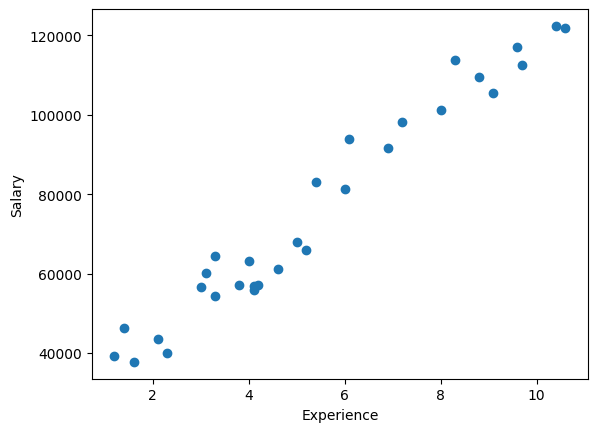

In [7]:
plt.scatter(df['YearsExperience'],df['Salary'])
plt.xlabel("Experience")
plt.ylabel("Salary")

In [8]:
# Use double brackets so X is 2D (sklearn requires shape: n_samples × n_features)
X = df[['YearsExperience']]
Y = df['Salary']


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test, = train_test_split(X,Y,test_size=0.2,random_state=2)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr = LinearRegression()

In [12]:
lr.fit(X_train,Y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [13]:
X_test

,YearsExperience
1,1.4
0,1.2
14,4.6
9,3.8
21,7.2
19,6.1


In [14]:
Y_pred = lr.predict(X_test)
Y_pred 

array([36834.63210301, 34920.71472592, 67457.3101364 , 59801.64062805,
       92338.23603852, 81811.69046455])

In [15]:
from sklearn.metrics import r2_score


r2 = r2_score(Y_test, Y_pred)
print("R² Score:", r2)

R² Score: 0.8886956733784562


Text(0, 0.5, 'Salary')

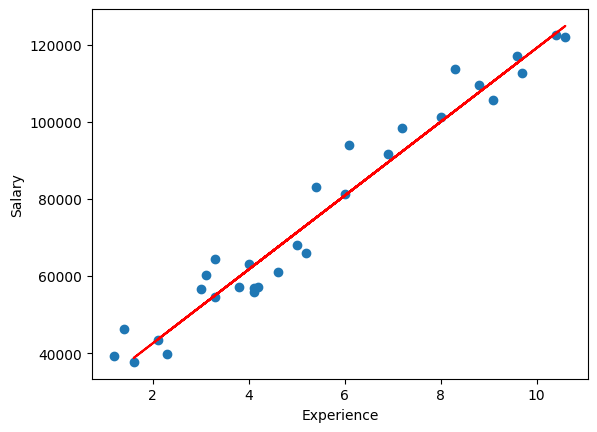

In [16]:
plt.scatter(df['YearsExperience'],df['Salary'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel("Experience")
plt.ylabel("Salary")


In [17]:
import pickle
import os

# Use absolute path so model saves in FastAPI_app (Jupyter cwd can be elsewhere)
pickled_model_path = "/Users/surajmaity/ML_projects/FastAPI_app/model.pkl"
with open(pickled_model_path, "wb") as f:
    pickle.dump(lr, f)
print(f"Model saved to: {pickled_model_path}")

Model saved to: /Users/surajmaity/ML_projects/FastAPI_app/model.pkl


,YearsExperience
23,8.3
6,3.1
3,2.1
20,6.9
5,3.0
27,9.7
12,4.1
4,2.3
10,4.0
16,5.2
